# Pymaceuticals Inc.
---

### Analysis
Based on the data and summary statistics, the comparison of the Capomulin and Ramicane drug regimens reveals that these treatments result in the lowest average tumor volumes compared to the other regimens. This suggests that Capomulin and Ramicane are more effective in suppressing tumor growth. Additionally, the standard errors are generally lower for these two regimens, indicating that their tumor volume estimates are less affected by sample variability, lower mean tumor volumes and more consistent results. In contrast, Ketapril and Naftisol show greater variability and higher standard errors, which may indicate that these drugs are less effective and exhibit higher variability in their outcomes. Infubinol shows a relatively high average tumor volume, but with a notable potential outlier at 36.32 mm³, which could indicate an unusual response to the treatment. This outlier highlights the need for further investigation into the factors that might lead to such a response.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicates['Mouse ID'].unique()
print(f"array({duplicate_mouse_ids}, dtype={duplicate_mouse_ids.dtype})")

array(['g989'], dtype=object)


In [6]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mouse_ids = merged_df.groupby(['Mouse ID', 'Timepoint']).filter(lambda x: len(x) > 1)['Mouse ID'].unique()
duplicate_data = merged_df[merged_df['Mouse ID'].isin(duplicate_mouse_ids)]

# Optional: Get all the data for the duplicate mouse ID.
duplicate_data 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
cleanedCount_id = cleaned_df['Mouse ID'].unique()
cleanedCount = len(cleanedCount_id)
cleanedCount

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

summary_list = []
for regimen, group in merged_df.groupby('Drug Regimen'):
    mean_tumor_volume = group['Tumor Volume (mm3)'].mean()
    median_tumor_volume = group['Tumor Volume (mm3)'].median()
    variance_tumor_volume = group['Tumor Volume (mm3)'].var()
    std_tumor_volume = group['Tumor Volume (mm3)'].std()
    sem_tumor_volume = st.sem(group['Tumor Volume (mm3)'])
    
    summary_list.append({
        'Drug Regimen': regimen,
        'Mean Tumor Volume': mean_tumor_volume,
        'Median Tumor Volume': median_tumor_volume,
        'Tumor Volume Variance': variance_tumor_volume,
        'Tumor Volume Std. Dev.': std_tumor_volume,
        'Tumor Volume Std. Err.': sem_tumor_volume
    })
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame(summary_list)
summary_stats.set_index('Drug Regimen', inplace=True)

# Assemble the resulting series into a single summary DataFrame.
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem=lambda x: x.sem()
)

summary_stats_agg = summary_stats_agg.style.set_caption("Tumor Volume (mm3)").set_table_styles(
    [{'selector': 'caption', 'props': [('text-align', 'right'), ('font-weight', 'bold')]}]
)
summary_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

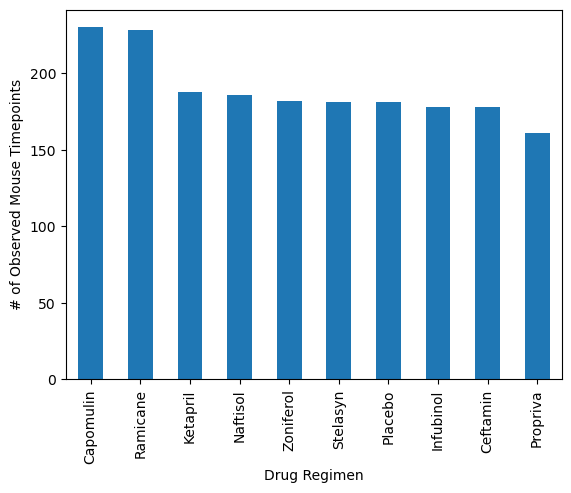

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = merged_df['Drug Regimen'].value_counts()
regimen_counts_df = pd.DataFrame(regimen_counts).reset_index()
regimen_counts_df.columns = ['Drug Regimen', 'Number of Rows']
plotBar = regimen_counts_df.plot(kind='bar', x='Drug Regimen', y='Number of Rows', legend=False)
plotBar.set_xlabel('Drug Regimen')
plotBar.set_ylabel('# of Observed Mouse Timepoints')
plotBar

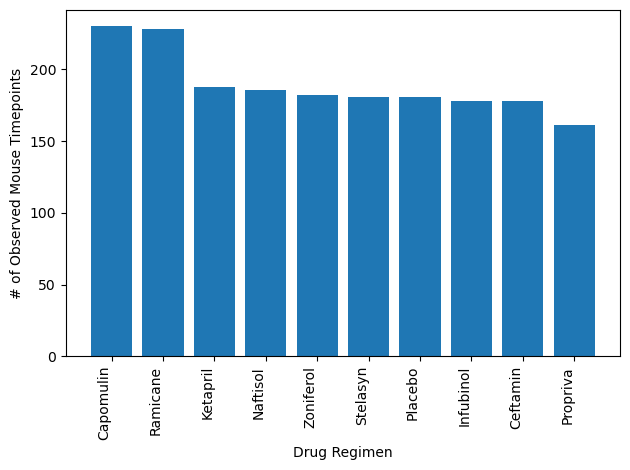

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

row_counts = merged_df['Drug Regimen'].value_counts()  # Count number of rows for each drug regimen
plt.bar(row_counts.index, row_counts, width=0.8)  # Adjust the bar width

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

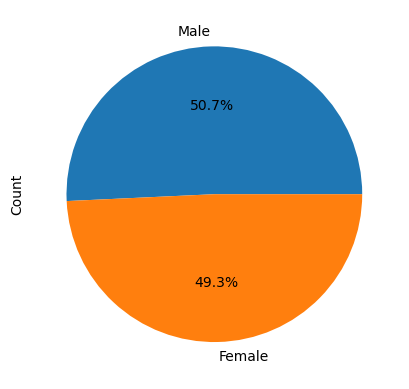

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

unique_mice = cleaned_df.drop_duplicates(subset='Mouse ID')
gender_counts = cleaned_df['Sex'].value_counts()

# Convert to data frame
gender_counts_df = pd.DataFrame(gender_counts).reset_index()
gender_counts_df.columns = ['Sex', 'Count']

# Get the unique mice with their gender
pieChart = gender_counts_df.plot.pie(
    y='Count',
    labels=gender_counts_df['Sex'],
    autopct='%1.1f%%',
    colors=['tab:blue', 'tab:orange'],
    legend=False,
)

# Make the pie chart
plt.show()

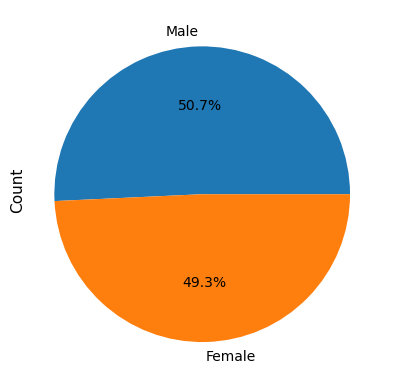

In [14]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['tab:blue', 'tab:orange'])

# Add the text "Count" to the left side of the pie chart
plt.text(-1.3, -0.1, 'Count', color='black', fontsize=11, rotation=90)

# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = merged_df[merged_df['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = merged_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_data = pd.merge(merged_df, last_timepoint, on=['Mouse ID', 'Timepoint'])

final_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.0,0,Ketapril,Male,15,29
1,x336,0,45.0,0,Naftisol,Female,4,29
2,h428,0,45.0,0,Ketapril,Female,1,27
3,v199,0,45.0,0,Naftisol,Female,17,29
4,o848,0,45.0,0,Stelasyn,Female,14,27


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for drug in treatments:
    # Select the rows for the current drug
    drug_data = final_data[final_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # Append the data to the list
    tumor_vol_data.append(drug_data)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify potential outliers
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    # Print outliers for each treatment
    if not outliers.empty:
        for index in outliers.index:
            # Retrieve the Mouse ID and tumor volume for the outlier
            tumor_volume = outliers.loc[index]
            print(f"{drug}'s potential outliers: Series {outliers.tolist()}, Tumor Volume (mm3), dtype: {drug_data.dtype}")
    else:
        print(f"{drug}'s potential outliers: Series [], Tumor Volume (mm3), dtype: {drug_data.dtype}")

Capomulin's potential outliers: Series [], Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: Series [], Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series [36.3213458], Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series [], Tumor Volume (mm3), dtype: float64


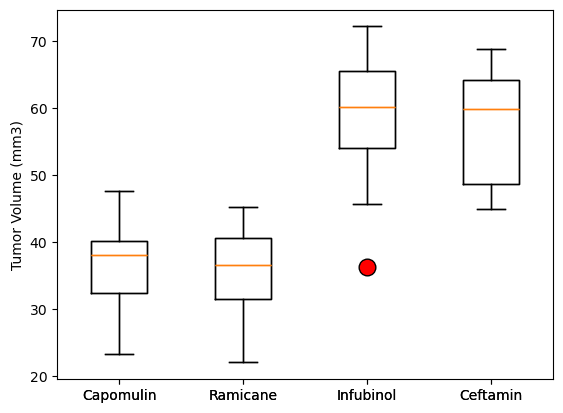

In [17]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
data = [final_data[final_data['Drug Regimen'] == drug]['Tumor Volume (mm3)'].values for drug in treatments]
plt.boxplot(data, labels=treatments)

# Customize outlier properties 
plt.boxplot(
    data,
    labels=treatments,
    flierprops=dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')
)
# Add y axis label
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

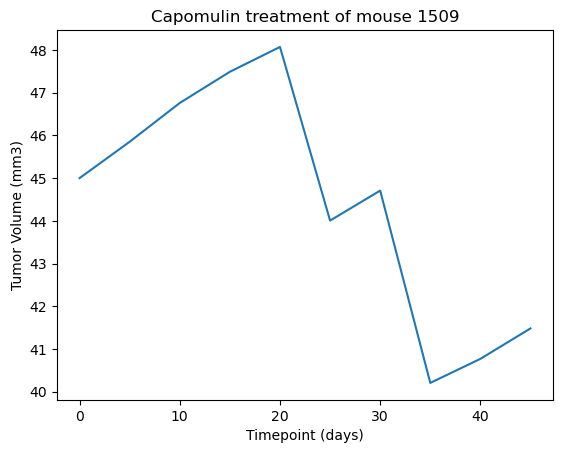

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']   # Filter for Capomulin 

# Plot mouse ID 1509
mouse_id = 'l509'
mouse_data = capomulin_df[capomulin_df['Mouse ID'] == mouse_id]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-')

# Add title and labels
plt.title(f'Capomulin treatment of mouse 1509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

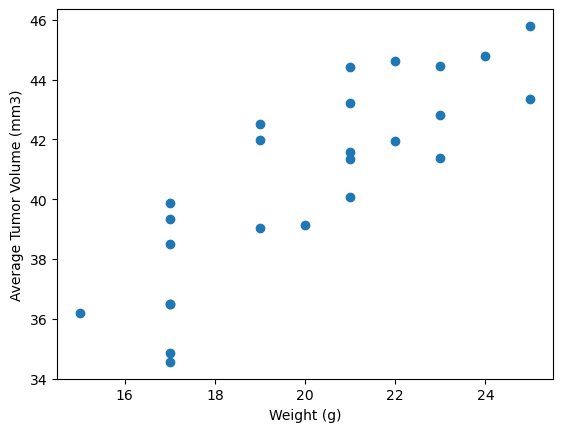

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
average_tumor_volume.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'}, inplace=True)
mouse_data = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID')

# Plot scatter plot
plt.scatter(mouse_data['Weight (g)'], mouse_data['Average Tumor Volume (mm3)'])

# Add x- & y- axis labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


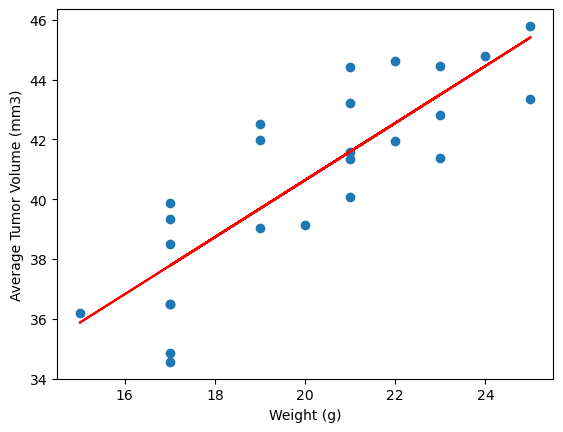

In [20]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Extract weight and average tumor volume arrays
weights = mouse_data['Weight (g)'].values
tumor_volumes = mouse_data['Average Tumor Volume (mm3)'].values

# Calculate correlation coefficient
correlation, _ = st.pearsonr(weights, tumor_volumes)
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(weights, tumor_volumes)

plt.plot(weights, intercept + slope * weights, color='red', label='Regression Line')  # Plot the regression line
plt.scatter(mouse_data['Weight (g)'], mouse_data['Average Tumor Volume (mm3)'])  # Plot scatter plot

# Add x- & y- axis labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()